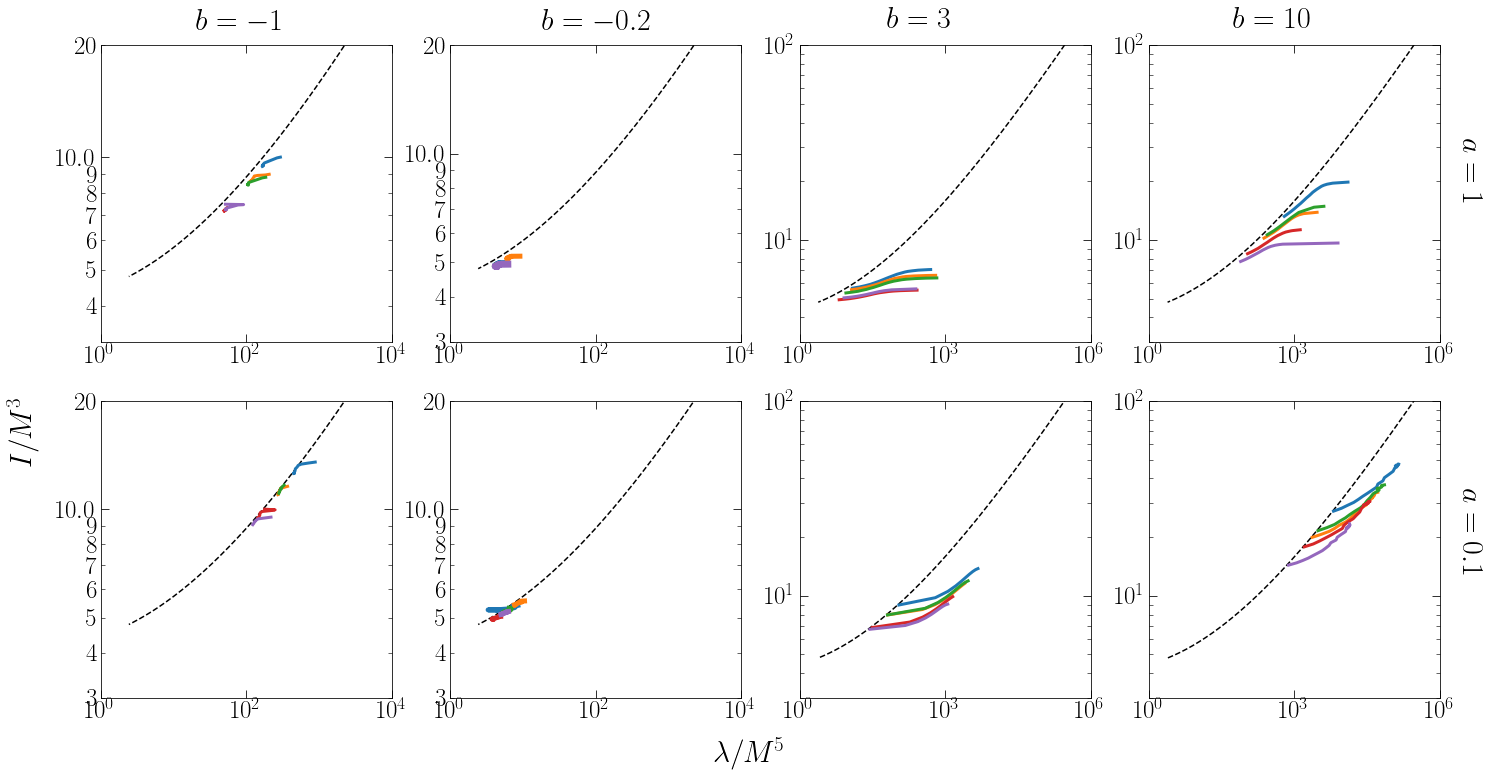

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log10 as lg
from numpy import pi as pi
from scipy.interpolate import interp1d as sp_interp1d
from scipy.integrate import odeint
from scipy.integrate import ode
import warnings
import timeit
import scipy.optimize as opt
from matplotlib import cm
from astropy import constants as const
from astropy import units as u
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.labelpad'] = 8.0
plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.tick_params(axis='both', which='minor', labelsize=18)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import sys
import warnings
import timeit
import scipy.optimize
from matplotlib import cm
from scipy.integrate import ode as sp_ode

t0 = timeit.time.time()
from shapely.geometry import LineString
from scipy.interpolate import UnivariateSpline
G=const.G.cgs.value
c=const.c.cgs.value
MSUN=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
KM=10**5
import math
plt.close()


Ms=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
km=10**5

PI4 = 4.0 * pi
ka = 8.0 * pi
c = 29979245800.0  # cm/s
G = 6.67408e-8  # cm^3/g/s^2

MSUN = 1.98855e33  # g
KM = 1.0e5  # cm
mB = 1.660538921e-24  # g
E_NUCL = 2.0e14  # minimun energy density for NS core; g/cm^3

runit = 10.*KM # length to parametrize quantities

def rdiml(r):
    """ dimensionless mass """
    return r/runit    
def mdiml(m):
    """ dimensionless mass """
    return G*m/c**2/runit
def Idiml(i):
    """ dimensionless moment of inertia """
    return i*G/c**2 / runit**3
    
    
fig, axs = plt.subplots(2, 4,figsize=(24,12),linewidth=2)
colorset=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'] 
#plt.setp(axs, xticks=[0, 0.5, 1,1.5,2,2.5])

axs[0,0].set_ylim(3.2,20)
axs[0,1].set_ylim(3,20)
axs[0,2].set_ylim(3,1e2)
axs[0,3].set_ylim(3,1e2)
axs[1,0].set_ylim(3,20)
axs[1,1].set_ylim(3,20)
axs[1,2].set_ylim(3,1e2)
axs[1,3].set_ylim(3,1e2)
axs[0,0].set_xlim(1,1e4)
axs[0,1].set_xlim(1,1e4)
axs[0,2].set_xlim(1,1e6)
axs[0,3].set_xlim(1,1e6)
axs[1,0].set_xlim(1,1e4)
axs[1,1].set_xlim(1,1e4)
axs[1,2].set_xlim(1,1e6)
axs[1,3].set_xlim(1,1e6)

#axs[0,0].gca().yaxis.set_major_formatter(ticker.ScalarFormatter())

ldata1 = np.genfromtxt('TOV_tidal_v1_data3.txt')
a10, a11, a12, a13, a14 = ldata1[:, 0], ldata1[:, 1], ldata1[:, 2], ldata1[:, 3], ldata1[:, 4]
def poly4f(x, a, b, c, d, e):
    return a + b*x + c*x**2 + d*x**3 + e*x**4

ntrim1 = np.argmax( a11 ) 

xset = np.log( a13[0: ntrim1] )
yset = poly4f(xset, 1.496, 0.05951, 0.02238, -6.953e-4, 8.345e-6)     # Yagi and Yunes' fit
yset1 = poly4f(xset, 1.493, 0.06433, 0.02104, -0.0005637, 3.947e-6)   # Rui's fit
#yset2 = poly4f(xset, 1.471, 0.06022, 0.01493, 5.933e-5, -1.007e-5)

xexpset = np.exp(xset)
yexpset = np.exp(yset)
yexpset1 = np.exp(yset1)
axs[0,0].loglog(xexpset, yexpset1, '--', color = 'black')
axs[0,1].loglog(xexpset, yexpset1, '--', color = 'black')
axs[0,2].loglog(xexpset, yexpset1, '--', color = 'black')
axs[0,3].loglog(xexpset, yexpset1, '--', color = 'black')
axs[1,0].loglog(xexpset, yexpset1, '--', color = 'black')
axs[1,1].loglog(xexpset, yexpset1, '--', color = 'black')
axs[1,2].loglog(xexpset, yexpset1, '--', color = 'black')
axs[1,3].loglog(xexpset, yexpset1, '--', color = 'black')

ntrim1set=[13, 16, 14, 15, 14]
ntrim2set=[22, 20, 16, 20]
ntrim3set=[17, 17, 18, 16, 14]
ntrim4set=[18, 14, 9, 16, 13]
ntrim5set=[18, 13, 12, 18, 13]
ntrim6set=[21, 21, 21, 24, 23]

from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as mticker    
# the first plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+21)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c921[0:ntrim1set[i]] 
    y21 = Idiml(c421[0:ntrim1set[i]])/(mdiml(c321[0:ntrim1set[i]]))**3
    axs[0,0].plot(x21, y21, color = colorset[i], linewidth=3)
#     axs[0,0].set_yticks([5,10,15,20])
    axs[0,0].yaxis.set_minor_formatter(mticker.ScalarFormatter())
    axs[0,0].yaxis.set_major_formatter(mticker.ScalarFormatter())
# the second plot
list2=[26,27,28,30]
for i in range(4):
    a=list2[i]
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(list2[i])+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c921[0:ntrim2set[i]]
    y21 = Idiml(c421[0:ntrim2set[i]])/(mdiml(c321[0:ntrim2set[i]]))**3
    if a!=30:
        axs[0,1].plot(x21, y21, color = colorset[i], linewidth=5) 
   
    else:
        axs[0,1].plot(x21, y21, color = colorset[i+1], linewidth=7)  
    axs[0,1].yaxis.set_minor_formatter(mticker.ScalarFormatter())
    axs[0,1].yaxis.set_major_formatter(mticker.ScalarFormatter())
    
# the third plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(31+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c921[0:ntrim3set[i]] 
    y21 = Idiml(c421[0:ntrim3set[i]])/(mdiml(c321[0:ntrim3set[i]]))**3
    #index=x21.argsort()
    #ydata=y21[index]
    #xdata=x21[index]
    #s1 = UnivariateSpline(xdata, ydata, s=5)
    #xs=np.linspace(min(xdata),max(xdata), 20)
    #ys=s1(xs)
    axs[0,2].plot(x21, y21, color = colorset[i], linewidth=3) 
    
         
# the fourth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(36+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c921[0:ntrim4set[i]] 
    y21 = Idiml(c421[0:ntrim4set[i]])/(mdiml(c321[0:ntrim4set[i]]))**3
    #index=x21.argsort()
    #ydata=y21[index]
    #xdata=x21[index]
    #s1 = UnivariateSpline(xdata, ydata, s=5)
    #xs=np.linspace(min(xdata),max(xdata),5)
    #ys=s1(xs)
    axs[0,3].plot(x21, y21, color = colorset[i], linewidth=3) 


# the fifth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(1+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c721[0:ntrim5set[i]] 
    y21 = Idiml(c421[0:ntrim5set[i]])/(mdiml(c321[0:ntrim5set[i]]))**3
    axs[1,0].plot(x21, y21, color = colorset[i], linewidth=3) 
    axs[1,0].yaxis.set_minor_formatter(mticker.ScalarFormatter())
    axs[1,0].yaxis.set_major_formatter(mticker.ScalarFormatter()) 
# the sixth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(6+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c721[0:ntrim6set[i]] 
    y21 = Idiml(c421[0:ntrim6set[i]])/(mdiml(c321[0:ntrim6set[i]]))**3
    axs[1,1].plot(x21, y21, color = colorset[i], linewidth=5)  
    axs[1,1].yaxis.set_minor_formatter(mticker.ScalarFormatter())
    axs[1,1].yaxis.set_major_formatter(mticker.ScalarFormatter())
# the seventh plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(11+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c721 
    y21 = Idiml(c421)/(mdiml(c321))**3
    index=x21.argsort()
    ydata=y21[index]
    xdata=x21[index]
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),10)
    ys=s1(xs)
    axs[1,2].plot(xs, ys, color = colorset[i], linewidth=3) 
      
# the eighth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(16+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c721 
    y21 = Idiml(c421)/(mdiml(c321))**3
    index=x21.argsort()
    ydata=y21[index]
    xdata=x21[index]
    s1 = UnivariateSpline(xdata, ydata, s=10)
    xs=np.linspace(min(xdata),max(xdata),10)
    ys=s1(xs)
    axs[1,3].plot(x21, y21, color = colorset[i], linewidth=3)
           
            
       
                      
fig.text(0.08, 0.40,r'$I/M^3$'  , ha='center', fontsize=30,rotation='vertical')
fig.text(0.48, 0.05, r'$\lambda/M^5$',fontsize=30)      
fig.text(0.91, 0.7, r'$a=1$' ,fontsize=30, rotation='-90')          
fig.text(0.91, 0.27, r'$a=0.1$' ,fontsize=30, rotation='-90')     
fig.text(0.18, 0.9, r'$b=-1$' ,fontsize=30)     
fig.text(0.38, 0.9, r'$b=-0.2$' ,fontsize=30)     
fig.text(0.58, 0.9, r'$b=3$' ,fontsize=30)   
fig.text(0.78, 0.9, r'$b=10$' ,fontsize=30)  
plt.savefig("fig_nonlin_MI.pdf", format='pdf', bbox_inches="tight")

plt.show()

